In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

In [6]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize images
y_train, y_test = y_train.flatten(), y_test.flatten()

In [7]:
# ----- Baseline Model (No Regularization) -----
baseline_model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [9]:
history_baseline = baseline_model.fit(
    x_train, y_train, epochs=10, batch_size=64,
    validation_split=0.2, verbose=2
)

Epoch 1/10
625/625 - 29s - 47ms/step - accuracy: 0.3221 - loss: 1.8871 - val_accuracy: 0.3551 - val_loss: 1.7983
Epoch 2/10
625/625 - 26s - 42ms/step - accuracy: 0.3899 - loss: 1.7004 - val_accuracy: 0.3971 - val_loss: 1.6952
Epoch 3/10
625/625 - 27s - 43ms/step - accuracy: 0.4247 - loss: 1.6108 - val_accuracy: 0.4232 - val_loss: 1.6316
Epoch 4/10
625/625 - 26s - 41ms/step - accuracy: 0.4457 - loss: 1.5495 - val_accuracy: 0.4415 - val_loss: 1.5628
Epoch 5/10
625/625 - 19s - 31ms/step - accuracy: 0.4640 - loss: 1.5063 - val_accuracy: 0.4343 - val_loss: 1.5917
Epoch 6/10
625/625 - 28s - 45ms/step - accuracy: 0.4734 - loss: 1.4749 - val_accuracy: 0.4517 - val_loss: 1.5396
Epoch 7/10
625/625 - 28s - 45ms/step - accuracy: 0.4863 - loss: 1.4410 - val_accuracy: 0.4532 - val_loss: 1.5395
Epoch 8/10
625/625 - 29s - 46ms/step - accuracy: 0.4951 - loss: 1.4150 - val_accuracy: 0.4694 - val_loss: 1.4956
Epoch 9/10
625/625 - 29s - 46ms/step - accuracy: 0.5028 - loss: 1.3930 - val_accuracy: 0.4643 - 

In [10]:
# ----- Model with Dropout -----
dropout_model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [11]:
dropout_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [12]:
history_dropout = dropout_model.fit(
    x_train, y_train, epochs=20, batch_size=64,
    validation_split=0.2, verbose=2
)

Epoch 1/20
625/625 - 41s - 65ms/step - accuracy: 0.1765 - loss: 2.1813 - val_accuracy: 0.2185 - val_loss: 2.1005
Epoch 2/20
625/625 - 30s - 48ms/step - accuracy: 0.1971 - loss: 2.0828 - val_accuracy: 0.2679 - val_loss: 2.0204
Epoch 3/20
625/625 - 30s - 48ms/step - accuracy: 0.2137 - loss: 2.0458 - val_accuracy: 0.2245 - val_loss: 2.0263
Epoch 4/20
625/625 - 28s - 45ms/step - accuracy: 0.2260 - loss: 2.0300 - val_accuracy: 0.2881 - val_loss: 1.9774
Epoch 5/20
625/625 - 18s - 28ms/step - accuracy: 0.2356 - loss: 2.0084 - val_accuracy: 0.2588 - val_loss: 1.9933
Epoch 6/20
625/625 - 24s - 39ms/step - accuracy: 0.2409 - loss: 1.9975 - val_accuracy: 0.2799 - val_loss: 1.9802
Epoch 7/20
625/625 - 22s - 36ms/step - accuracy: 0.2447 - loss: 1.9867 - val_accuracy: 0.2738 - val_loss: 2.0034
Epoch 8/20
625/625 - 49s - 78ms/step - accuracy: 0.2490 - loss: 1.9783 - val_accuracy: 0.2923 - val_loss: 1.9616
Epoch 9/20
625/625 - 26s - 42ms/step - accuracy: 0.2519 - loss: 1.9661 - val_accuracy: 0.2936 - 

In [13]:
# ----- Model with L2 Weight Regularization -----
l2_model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

In [14]:
l2_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [15]:
history_l2 = l2_model.fit(
    x_train, y_train, epochs=20, batch_size=64,
    validation_split=0.2, verbose=2
)

Epoch 1/20
625/625 - 29s - 46ms/step - accuracy: 0.3194 - loss: 2.2892 - val_accuracy: 0.3562 - val_loss: 1.9547
Epoch 2/20
625/625 - 27s - 44ms/step - accuracy: 0.3818 - loss: 1.8610 - val_accuracy: 0.3842 - val_loss: 1.8525
Epoch 3/20
625/625 - 24s - 38ms/step - accuracy: 0.4097 - loss: 1.7608 - val_accuracy: 0.3953 - val_loss: 1.7841
Epoch 4/20
625/625 - 27s - 43ms/step - accuracy: 0.4223 - loss: 1.7090 - val_accuracy: 0.4335 - val_loss: 1.6953
Epoch 5/20
625/625 - 23s - 38ms/step - accuracy: 0.4330 - loss: 1.6792 - val_accuracy: 0.4360 - val_loss: 1.6779
Epoch 6/20
625/625 - 28s - 45ms/step - accuracy: 0.4441 - loss: 1.6455 - val_accuracy: 0.4362 - val_loss: 1.6922
Epoch 7/20
625/625 - 30s - 47ms/step - accuracy: 0.4464 - loss: 1.6398 - val_accuracy: 0.4287 - val_loss: 1.7309
Epoch 8/20
625/625 - 30s - 48ms/step - accuracy: 0.4548 - loss: 1.6181 - val_accuracy: 0.4236 - val_loss: 1.7139
Epoch 9/20
625/625 - 29s - 47ms/step - accuracy: 0.4620 - loss: 1.6012 - val_accuracy: 0.4512 - 

In [16]:
# ----- Model with Early Stopping -----
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

In [17]:
early_model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
early_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [19]:
history_early = early_model.fit(
    x_train, y_train, epochs=50, batch_size=64,
    validation_split=0.2, verbose=2,
    callbacks=[early_stop]
)


Epoch 1/50
625/625 - 43s - 69ms/step - accuracy: 0.2169 - loss: 2.0869 - val_accuracy: 0.2906 - val_loss: 1.9283
Epoch 2/50
625/625 - 28s - 45ms/step - accuracy: 0.2538 - loss: 1.9820 - val_accuracy: 0.3152 - val_loss: 1.9212
Epoch 3/50
625/625 - 21s - 34ms/step - accuracy: 0.2690 - loss: 1.9510 - val_accuracy: 0.3210 - val_loss: 1.9310
Epoch 4/50
625/625 - 28s - 45ms/step - accuracy: 0.2785 - loss: 1.9240 - val_accuracy: 0.3119 - val_loss: 1.9647
Epoch 5/50
625/625 - 40s - 65ms/step - accuracy: 0.2860 - loss: 1.9159 - val_accuracy: 0.3470 - val_loss: 1.9174
Epoch 6/50
625/625 - 28s - 45ms/step - accuracy: 0.2914 - loss: 1.9065 - val_accuracy: 0.3189 - val_loss: 1.9314
Epoch 7/50
625/625 - 20s - 32ms/step - accuracy: 0.2954 - loss: 1.8913 - val_accuracy: 0.3348 - val_loss: 1.8982
Epoch 8/50
625/625 - 25s - 41ms/step - accuracy: 0.3041 - loss: 1.8808 - val_accuracy: 0.3344 - val_loss: 1.9171
Epoch 9/50
625/625 - 19s - 30ms/step - accuracy: 0.3048 - loss: 1.8747 - val_accuracy: 0.3395 - 

In [20]:
# ----- Evaluate Models -----
print("\nBaseline Model Accuracy:")
baseline_model.evaluate(x_test, y_test, verbose=2)


Baseline Model Accuracy:
313/313 - 3s - 8ms/step - accuracy: 0.4910 - loss: 1.4408


[1.4408011436462402, 0.4909999966621399]

In [21]:
print("\nDropout Model Accuracy:")
dropout_model.evaluate(x_test, y_test, verbose=2)


Dropout Model Accuracy:
313/313 - 3s - 8ms/step - accuracy: 0.2706 - loss: 1.9712


[1.9711925983428955, 0.27059999108314514]

In [22]:
print("\nL2 Regularized Model Accuracy:")
l2_model.evaluate(x_test, y_test, verbose=2)


L2 Regularized Model Accuracy:
313/313 - 3s - 9ms/step - accuracy: 0.4788 - loss: 1.5826


[1.582578420639038, 0.4787999987602234]

In [23]:
print("\nEarly Stopping Model Accuracy:")
early_model.evaluate(x_test, y_test, verbose=2)


Early Stopping Model Accuracy:
313/313 - 2s - 7ms/step - accuracy: 0.3781 - loss: 1.8412


[1.8412437438964844, 0.3781000077724457]

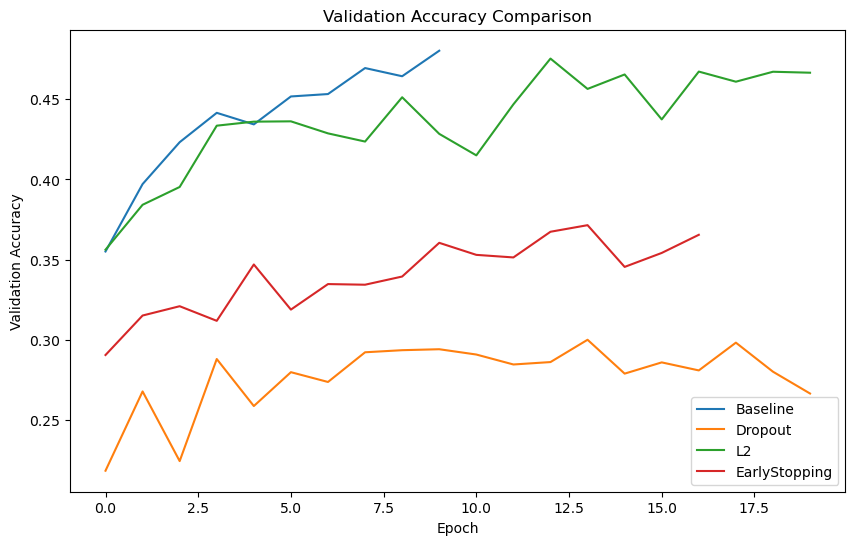

In [24]:
import matplotlib.pyplot as plt

def plot_history(histories, titles):
    plt.figure(figsize=(10,6))
    for hist, title in zip(histories, titles):
        plt.plot(hist.history['val_accuracy'], label=title)
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()

plot_history(
    [history_baseline, history_dropout, history_l2, history_early],
    ['Baseline', 'Dropout', 'L2', 'EarlyStopping']
)